# Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import subfunc as sf
import warnings

In [2]:
RAW_DATA = 'data/evras.csv'
POST_PROCESSING_TRAIN_DATA = 'data/X_train.csv'
POST_PROCESSING_TRAIN_DATA_LABELS = 'data/y_train.csv'
POST_PROCESSING_TEST_DATA = 'data/X_test.csv'
POST_PROCESSING_TEST_DATA_LABELS = 'data/y_test.csv'
SOURCE_DATA = 'source/'

In [3]:
pd.options.display.max_columns = 90
warnings.filterwarnings("ignore")

In [4]:
target_columns = ['химшлак последний Al2O3',
                  'химшлак последний CaO',
                  'химшлак последний R',
                  'химшлак последний SiO2']

 * Информация о данных

In [5]:
data = pd.read_csv(RAW_DATA, sep=';', index_col='index', decimal=',')
data.describe(include='all')

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),N2 (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,расход газ N2,расход C пров.,сыпуч известь РП,сыпуч кварцит,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь (сух.),сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeMo,ферспл FeSi-75,ферспл FeV азот.,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл Ni H1 пласт.,ферспл SiMn18,ферспл ферванит,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
count,7041,7041,7041,7041,6444.000000,6440.000000,6440.000000,6444.000000,5249.000000,6435.000000,5883.000000,6431.000000,6431.000000,6178.000000,6436.000000,6436.000000,6426.000000,1389.000000,6440.000000,6444.000000,6444.000000,6444.0,6444.0,6426.000000,1389.000000,724.000000,4770.000000,13.00,6422.000000,7.000000,6307.000000,5910.000000,6244.000000,33.000000,5.000000,383.000000,6179.000000,6400.000000,82.000000,6398.000000,1017.000000,5883.000000,6440.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6443.000000,6443.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6218.000000,6444.000000,6444.000000,6444.000000,6444.000000,6442.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,6444.000000,4742.000000,6444.000000,6444.000000,6443.000000,6444.000000,6444.000000,4742.000000,4742.000000,6444.000000,6444.000000,6443.000000,6444.000000,6444.000000,4742.000000
unique,7041,7041,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,г683863?6=;,2070-07-22 14:53:00,Э76ХФ,Р65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,4953,6427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,26.492241,46.194099,21.010523,46.063051,3.004414,0.403088,0.117692,0.139068,0.130561,0.051366,1567.771753,1587.973897,11.593261,13.227743,12989.038791,114.404252,1.009001,1.0,1.0,15.450528,10.547284,0.020862,0.132179,0.02,0.066706,0.385714,0.420162,0.054730,0.020086,0.019429,0.044000,0.023845,0.061368,0.143436,0.039869,0.215540,0.026624,0.208039,4557.236180,0.001782,0.466162,0.273289,0.101999,0.672277,0.007049,0.009971,0.07099

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7041 entries, 0 to 7040
Data columns (total 84 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   nplv                            7041 non-null   object 
 1   DT                              7041 non-null   object 
 2   МАРКА                           7041 non-null   object 
 3   ПРОФИЛЬ                         7041 non-null   object 
 4   t вып-обр                       6444 non-null   float64
 5   t обработка                     6440 non-null   float64
 6   t под током                     6440 non-null   float64
 7   t продувка                      6444 non-null   float64
 8   ПСН гр.                         5249 non-null   float64
 9   чист расход C                   6435 non-null   float64
 10  чист расход Cr                  5883 non-null   float64
 11  чист расход Mn                  6431 non-null   float64
 12  чист расход Si                  64

 * Нахождение самой популярной марки

In [7]:
top_mark = data.describe(include='all').loc["top", "МАРКА"]
print("Самая популярная марка - ", top_mark)

Самая популярная марка -  Э76ХФ


* Переводим дату во время изготовления сплава

In [8]:
data['DT'] = sf.date_to_interval(data['DT'])

* Процент пропущенных значений в датасете

In [9]:
data.isnull().sum().sort_values(ascending= False).apply(lambda x : x / data.shape[0])[:15]

ферспл FeSi-75                0.999290
сыпуч  кокс. мелочь (сух.)    0.999006
сыпуч кварцит                 0.998154
ферспл FeMo                   0.995313
ферспл  Ni H1 пласт.          0.988354
ферспл FeV азот.              0.945604
расход C пров.                0.897174
ферспл  ферванит              0.855560
расход газ  N2                0.802727
N2 (интенс.)                  0.802727
химшлак последний SiO2        0.326516
химшлак последний Al2O3       0.326516
химшлак первый SiO2_1         0.326516
химшлак первый Al2O3_1        0.326516
сыпуч известь РП              0.322539
dtype: float64

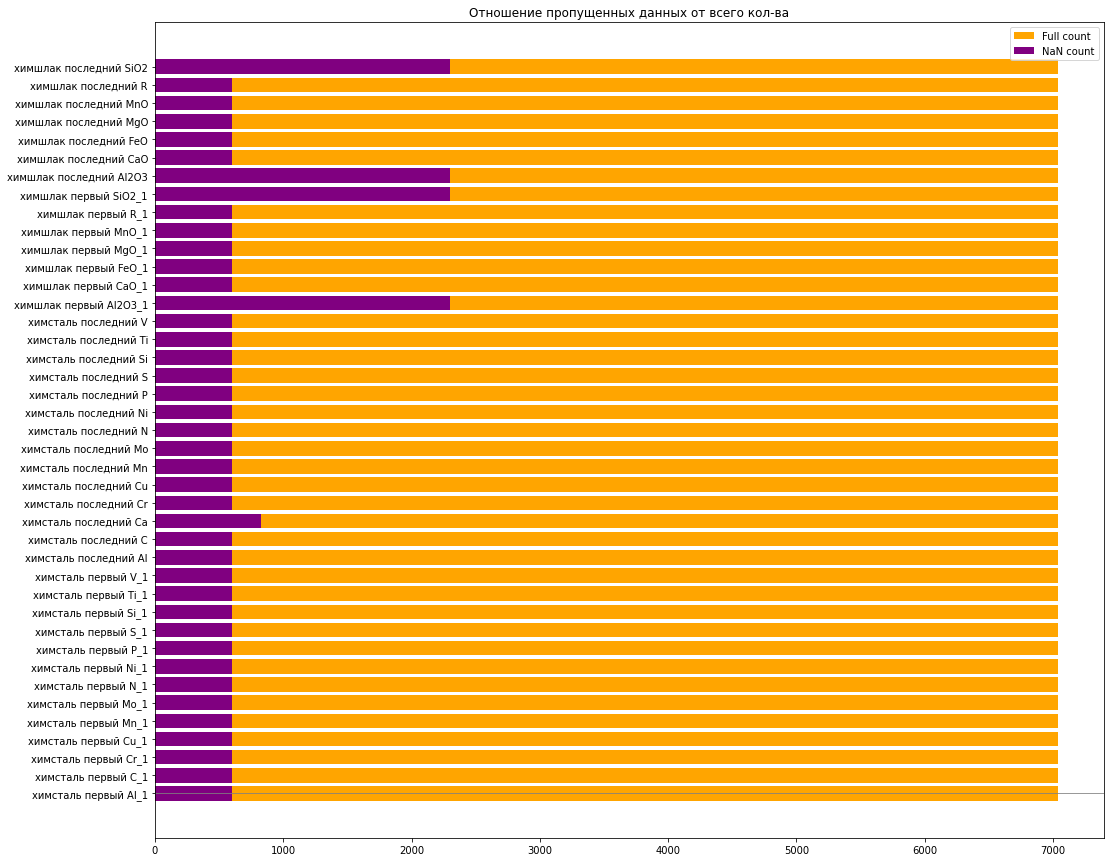

In [10]:
import re
from matplotlib import pyplot as plt

df_him = data[[column for column in data.columns if re.search('хим',
                                                                  column.lower())]]
df_nan_count = df_him.isnull().sum(axis=0)
df_full_count = df_him.notnull().sum() + df_nan_count

ind = np.arange(len(df_him.columns))

fig, ax = plt.subplots(figsize=(17, 15))

ax.barh(ind, df_full_count, label='Full count', color='orange')
ax.barh(ind, df_nan_count, label='NaN count', color='purple')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_title('Отношение пропущенных данных от всего кол-ва')
ax.set_yticks(ind)
ax.set_yticklabels(df_him.columns)
ax.legend()

plt.savefig(f'{SOURCE_DATA}nan.png')

del df_him
del df_nan_count
del df_full_count

* Оставляем колонки с > 65% известных данных, а также удаляем колонки с бесполезной информацией

In [11]:
dropped_data = sf.drop_columns(data,0.65)
marked_data = dropped_data[dropped_data['МАРКА'] == top_mark]
marked_data = marked_data.drop(columns= ['nplv', 'ПРОФИЛЬ', 'МАРКА'])

Удаленные колонки: N2 (интенс.), расход газ  N2, расход C пров., сыпуч кварцит, сыпуч  кокс. мелочь (сух.), ферспл FeMo, ферспл FeSi-75, ферспл FeV азот., ферспл  Ni H1 пласт., ферспл  ферванит


* Удаляем строки, где пропущены значения для целевых переменных

In [12]:
marked_data = marked_data.dropna(axis = 0,subset = target_columns)

 * Заполняем пропущенные данные с помощью метода MICE

In [13]:
marked_data = sf.fill_empty_values(marked_data)

* Выведем распределение наших целевых переменных

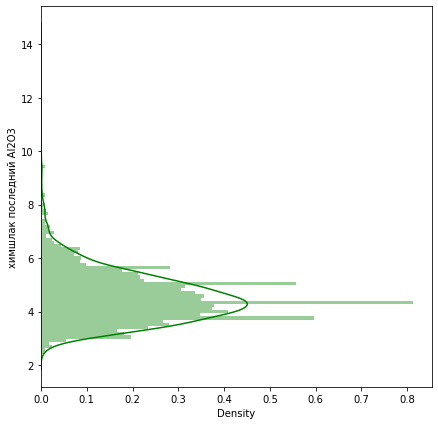

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
sns.distplot(marked_data['химшлак последний Al2O3'], color='g', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
plt.savefig(f'{SOURCE_DATA}target_range_1.png')

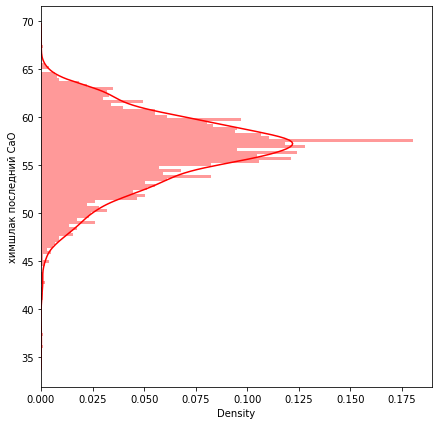

In [15]:
plt.figure(figsize=(7, 7))
sns.distplot(marked_data['химшлак последний CaO'], color='r', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
plt.savefig(f'{SOURCE_DATA}target_range_2.png')

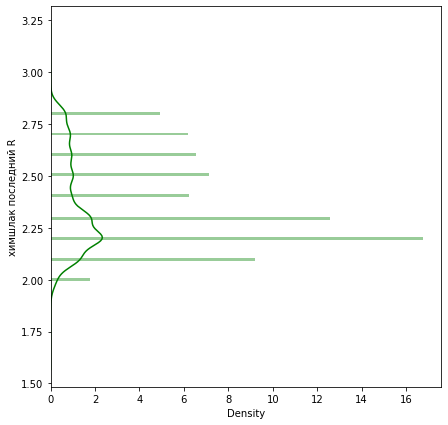

In [16]:
plt.figure(figsize=(7, 7))
sns.distplot(marked_data['химшлак последний R'], color='g', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
plt.savefig(f'{SOURCE_DATA}target_range_3.png')

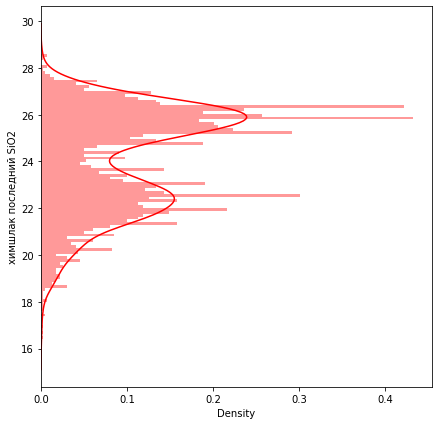

In [17]:
plt.figure(figsize=(7, 7))
sns.distplot(marked_data['химшлак последний SiO2'], color='r', bins=100, hist_kws={'alpha': 0.4}, vertical=True)
plt.savefig(f'{SOURCE_DATA}target_range_4.png')

* Сделаем нормализацию данных

In [18]:
normalized_data = sf.normalize_data(marked_data)
del marked_data

* Распределение значений признаков до обработки данных

In [19]:
#sns_plot = sns.pairplot(normalized_data,
#                    x_vars=normalized_data.columns,
#                    y_vars=target_columns)
#sns_plot.savefig('source/multi_map_preprocessing.png')

 * Дисперсия до обработки данных

In [20]:
#dispersion_ax = normalized_data.var().sort_values().plot(kind='barh', figsize=(13, 25), grid=True)
#dispersion_fig = dispersion_ax.get_figure()
#dispersion_fig.savefig('source/dispersion_bar_preprocessing.png')

Напечатаем график корреляции между признаками

In [21]:
corr_data = normalized_data.drop(columns=target_columns).corr()

#plt.figure(figsize=(52, 50))
#sns.heatmap(corr_data[(corr_data >= 0.5) | (corr_data <= -0.4)],
#         cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
#         annot=True, annot_kws={"size": 8}, square=True)
#plt.savefig(f'{SOURCE_DATA}correletion_map.png')


In [22]:
useless_list = []
for ind in corr_data.index:
    for col in corr_data.columns:
        if ind != col and abs(corr_data.loc[ind, col] >= 0.8 ):
            if [col, ind, corr_data.loc[ind, col]] not in useless_list:
                useless_list.append([ind, col, corr_data.loc[ind, col]])

del corr_data
useless_list

[['t обработка', 't продувка', 0.990575907545456],
 ['t под током', 'эл. энергия', 0.960054314097455],
 ['чист расход C', 'сыпуч  кокс. мелочь КМ1', 0.8704640749531927],
 ['чист расход Cr', 'ферспл  фх850А', 0.9971902451582776],
 ['чист расход Mn', 'ферспл SiMn18', 0.9987239086098972],
 ['чист расход Si', 'ферспл  Mn5Si65Al0.5', 0.9444202241305213],
 ['чист расход V', 'ферспл  FeV-80', 0.9888106132570127],
 ['Ar (интенс.)', 'расход газ Ar', 0.8532494223017726],
 ['химсталь первый Cu_1', 'химсталь последний Cu', 0.990623998688086],
 ['химсталь первый Mo_1', 'химсталь последний Mo', 0.9571484699363622],
 ['химсталь первый Ni_1', 'химсталь последний Ni', 0.9942577617187606],
 ['химсталь первый P_1', 'химсталь последний P', 0.9578523669743539]]

В списке "useless_list" помимо дйствительно коррелирующих признаков есть признаки, которые мы отметили, как ложно-коррелирующие
Список коррелирующих:
 * 'химсталь первый Cr_1', 'химсталь последний Cr'
 * 'химсталь первый Cu_1', 'химсталь последний Cu'
 * 'химсталь первый Mo_1', 'химсталь последний Mo'
 * 'химсталь первый Ni_1', 'химсталь последний Ni'
 * 'химсталь первый P_1', 'химсталь последний P'
 * 'химсталь первый Si_1', 'химсталь последний Si'
 * 't обработка', 't продувка'
 * 't под током', 'эл. энергия'

Из карты корреляции видно, что свойства объектов 'произв количество плавок ' и 'произв количество плавок (цел)'
не коррелирует даже сами с собой, рассмотрим их более внимательно


In [23]:
normalized_data[['произв  количество плавок','произв количество плавок (цел)']].describe()

,произв количество плавок,произв количество плавок (цел)
count,3264.0,3264.0
mean,1.0,1.0
std,0.0,0.0
min,1.0,1.0
25%,1.0,1.0
50%,1.0,1.0
75%,1.0,1.0
max,1.0,1.0


Из описания следует, что эти два признака имеют только по одному уникальному значению,
тк среднее кв. отклонение равно нулю, избавимся от них.

In [24]:
correlation_list = ['t обработка',
                    't под током',
                    'произв  количество плавок',
                    'произв количество плавок (цел)',
                    'произв количество обработок',
                    'химсталь первый Cr_1',
                    'химсталь первый Cu_1',
                    'химсталь первый Mo_1',
                    'химсталь первый Ni_1',
                    'химсталь первый P_1',
                    'химсталь первый Si_1'
]

normalized_data = normalized_data.drop(columns=correlation_list)

Посмотрим на корреляцию между таргетами и выведем график

In [25]:
corr_target = normalized_data[target_columns].corr()

#plt.figure(figsize=(15, 15))
#sns.heatmap(corr_target,
#                 cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
#                 annot=True, annot_kws={"size": 8}, square=True)
#plt.savefig(f'{SOURCE_DATA}correletion_map_target.png')

Выделяется корреляция между таргетами 'химшлак последний R' и 'химшлак последний SiO2'

Избавление от аномалий

In [26]:
normalized_data = sf.remove_noises(normalized_data)


 * Дисперсия после обработки данных

In [27]:
#dispersion_ax = normalized_data.var().sort_values().plot(kind='barh',
#                                                         figsize=(13, 25),
#                                                         grid=True)
#dispersion_fig = dispersion_ax.get_figure()
#dispersion_fig.savefig('source/dispersion_bar_postprocessing.png')

In [28]:
#sns_plot = sns.pairplot(normalized_data,
#                    x_vars=normalized_data.columns,
#                    y_vars=target_columns)
#sns_plot.savefig('source/multi_map_postprocessing.png')

* Отбор признаков

In [29]:
normalized_data = sf.filter_features(normalized_data.drop(columns=target_columns),
                   normalized_data[target_columns])

удалили признаков: 47


In [32]:
normalized_data

,чист расход Si,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый MgO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний Al2O3,химшлак последний CaO,химшлак последний R,химшлак последний SiO2
index,,,,,,,,,,,,,
589,0.110565,0.050000,0.647287,0.390879,0.270270,0.678571,0.318182,0.180685,0.035461,0.067797,0.598101,0.500000,0.557377
1345,0.295080,0.266667,0.457364,0.426710,0.243243,0.535714,0.090909,0.426791,0.070922,0.237288,0.588608,0.285714,0.836066
1348,0.292535,0.191667,0.544574,0.319218,0.243243,0.633929,0.227273,0.230530,0.056738,0.169492,0.623418,0.285714,0.860656
1662,0.243034,0.258333,0.600775,0.345277,0.378378,0.455357,0.136364,0.283489,0.042553,0.177966,0.629747,0.214286,0.901639
1663,0.242958,0.241667,0.554264,0.293160,0.270270,0.566964,0.227273,0.227414,0.070922,0.203390,0.604430,0.214286,0.885246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.343104,0.183333,0.556202,0.374593,0.216216,0.660714,0.363636,0.208723,0.099291,0.355932,0.639241,0.428571,0.672131
7023,0.266100,0.150000,0.480620,0.257329,0.324324,0.446429,0.090909,0.299065,0.085106,0.220339,0.683544,0.571429,0.573770
7024,0.243084,0.225000,0.560078,0.286645,0.297297,0.535714,0.227273,0.211838,0.056738,0.322034,0.699367,0.428571,0.721311


Разбиение датасета на обучающую и тестовую выборки

In [33]:
test_data = normalized_data.sample(frac= 0.3)
train_data = normalized_data.drop(test_data.index, axis='index')

In [34]:
X_test_data = test_data.drop(columns= target_columns)
labels_test_data = test_data[target_columns]
X_train_data = train_data.drop(columns= target_columns)
labels_train_data = train_data[target_columns]

In [35]:
X_train_data.to_csv(POST_PROCESSING_TRAIN_DATA, sep = '\t')
X_test_data.to_csv(POST_PROCESSING_TEST_DATA, sep = '\t')
labels_train_data.to_csv(POST_PROCESSING_TRAIN_DATA_LABELS, sep = '\t')
labels_test_data.to_csv(POST_PROCESSING_TEST_DATA_LABELS, sep = '\t')

In [57]:
from sklearn.ensemble import IsolationForest

out_forest = IsolationForest()
out_forest.fit(normalized_data.iloc[:, 1:])
outlier_predicted = out_forest.predict(normalized_data.iloc[:, 1:])
normalized_data = normalized_data[outlier_predicted == 1].copy()
normalized_data.shape


(3208, 59)

Разбиение датасета на обучающую и тестовую выборки

In [58]:
test_data = normalized_data.sample(frac= 0.3)
train_data = normalized_data.drop(test_data.index, axis='index')


In [26]:
X_test_data = test_data.drop(columns= target_columns)
labels_test_data = test_data[target_columns]
X_train_data = train_data.drop(columns= target_columns)
labels_train_data = train_data[target_columns]

In [27]:
X_train_data.to_csv(POST_PROCESSING_TRAIN_DATA, sep = '\t')
X_test_data.to_csv(POST_PROCESSING_TEST_DATA, sep = '\t')
labels_train_data.to_csv(POST_PROCESSING_TRAIN_DATA_LABELS, sep = '\t')
labels_test_data.to_csv(POST_PROCESSING_TEST_DATA_LABELS, sep = '\t')
